In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 1. "sample_data.csv"から表データをpandasでロードし、インデックスを"time"カラムに設定
df = pd.read_csv('sample_data.csv', index_col='time')
# "machine_file.csv"から表データをpandasでロード
machine_df = pd.read_csv('machine_file.csv')
# machine_df = machine_df.set_index('ID')

# dfデータフレームに"type"カラムを追加
df = df.reset_index().merge(machine_df[['ID', 'type']], on='ID', how='left').set_index('time')

# 2. ロードしたデータから各IDごとの平均、分散、サンプルサイズをまとめたDataFrameを作る
result = df.groupby('ID').agg({'value': ['mean', 'var', 'count']})
result.columns = ['mean', 'var', 'count']

<AxesSubplot:xlabel='ID', ylabel='value'>

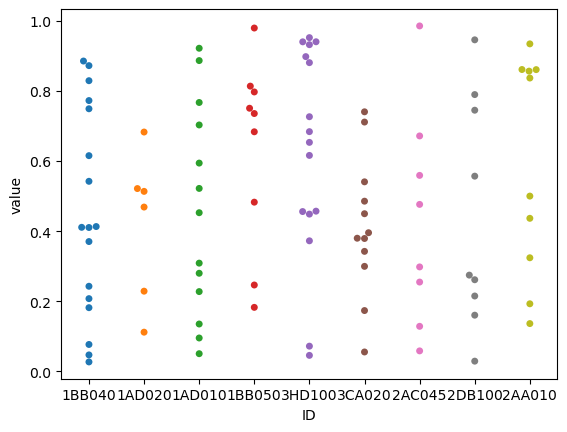

In [4]:
# IDごとにvalueの分布を表示する図を作成する
sns.swarmplot(x='ID', y='value', data=df)

In [32]:
# machine_id = ['1AD010', '1AD020', '1BB040', '1BB050', '2AA010', '2AC045', '2DB100', '3CA020', '3HD100']
# machine_type = ['B', 'C', 'B', 'A', 'D', 'C', 'A', 'B', 'B']

# data = {'ID':machine_id,
#         'type':machine_type}

# df = pd.DataFrame(data)
# df.to_csv('machine_file.csv', index=False)

In [ ]:
# for type in ['A', 'B', 'C', 'D']:
#     # typeが"A"のデータのみ抽出します。
#     df_graph = df[df["type"] == type]

#     # グラフを2つ作成します。
#     fig, (ax1, ax2) = plt.subplots(1, 2)

#     # 箱ひげ図を作成します。
#     # sns.boxplot(x="ID", y="value", data=df, ax=ax1)

#     # IDごとにvalueの分布を表示する図を作成する
#     sns.swarmplot(x='ID', y='value', data=df, ax=ax2)

#     plt.tight_layout()

In [ ]:
g = sns.catplot(x="ID", y="value", col="type", data=df, kind="swarm")
# typeごとに横軸のラベルを設定します。
for ax in g.axes.flat:
    # 現在のグラフのtypeを取得します。
    current_type = ax.get_title().split(" = ")[-1]
    
    # 現在のグラフのtypeに対応するデータを抽出します。
    current_data = df[df["type"] == current_type]
    
    # 目盛りの位置を設定します。
    ax.set_xticks(range(len(current_data["ID"].unique())))
    
    # 横軸のラベルを設定します。
    ax.set_xticklabels(current_data["ID"].unique())

In [41]:
ID = ['1BB040', '1AD020', '1AD010', '1BB050', '3HD100', '3CA020','2AC045', '2DB100', '2AA010']
val = []
for id in ID:
    if id[0] == '1':
        val.append(0.3)
    elif id[0] == '2':
        val.append(0.4)
    else:
        val.append(0.5)
th = {
    'ID':ID,
    'threshold':val
}
df_threshold = pd.DataFrame(th)

In [61]:
for i, id in enumerate(df[df['type']=='B']['ID'].unique()):
    print(i)
df_threshold

0
1
2
3


,ID,threshold
0,1BB040,0.3
1,1AD020,0.3
2,1AD010,0.3
3,1BB050,0.3
4,3HD100,0.5
5,3CA020,0.5
6,2AC045,0.4
7,2DB100,0.4
8,2AA010,0.4


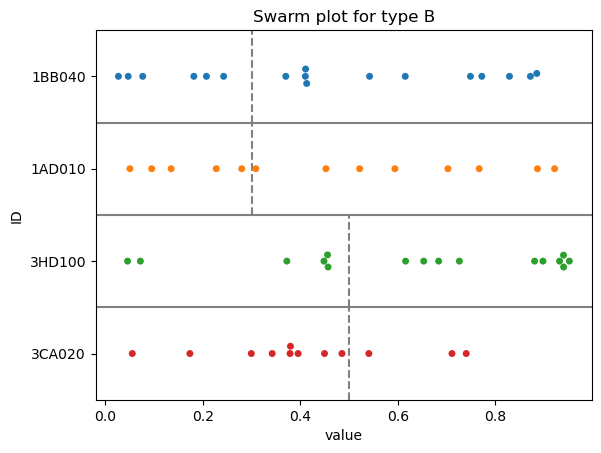

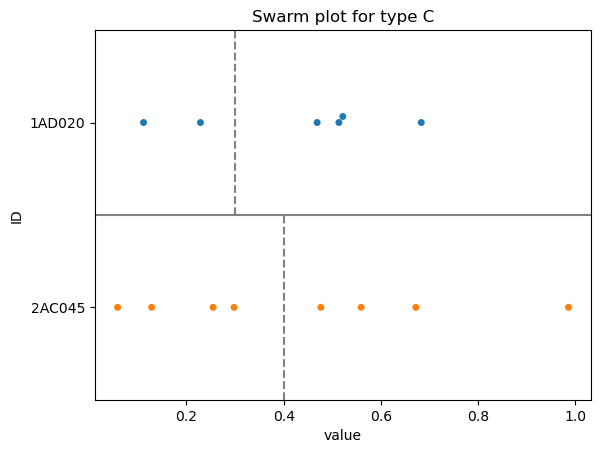

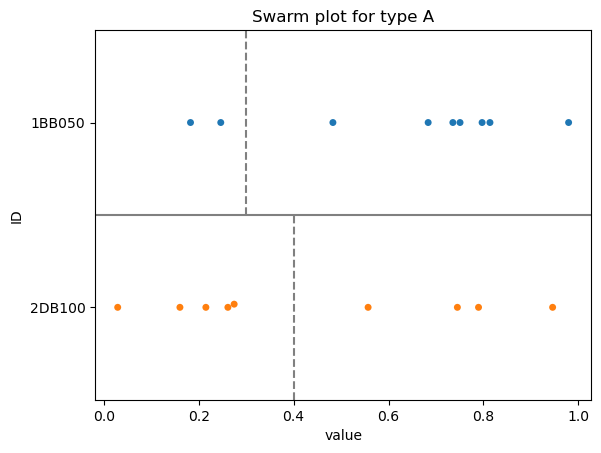

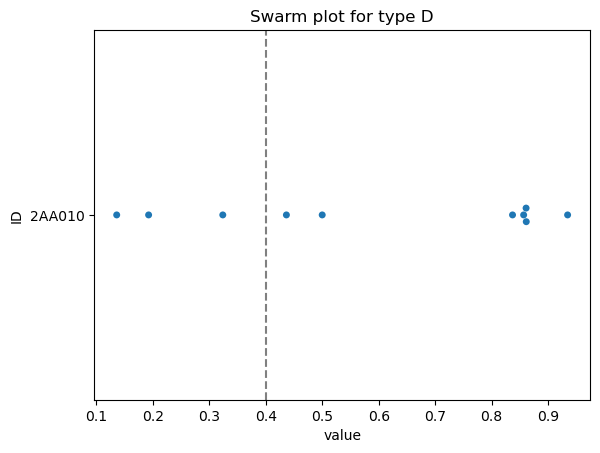

In [59]:
def create_swarm_plot(data, th):
    types = data['type'].unique()
    for t in types:
        plt.figure()
        ax = sns.swarmplot(x='value', y='ID', hue='ID', data=data[data['type'] == t], orient='h')
        ax.legend_.remove()
        plt.title(f'Swarm plot for type {t}')
        n = len(data[data['type'] == t]['ID'].unique())
        for i, id in enumerate(data[data['type']==t]['ID'].unique()):
            ax.axvline(
                x=df_threshold.loc[df_threshold['ID']==id,'threshold'].item(), 
                ymin=1-1/n*(i+1), 
                ymax=1-1/n*i, 
                linestyle='--', 
                color='grey')
        for i in range(n-1):
            ax.axhline(y=i+0.5, color='grey', linestyle='solid')
    plt.show()
create_swarm_plot(df, th)

In [44]:

# def create_swarm(df, th):
#     # typeのユニークな値を取得し、グラフの数を決定する
#     types = df['type'].unique()
#     n_graphs = len(types)

#     # グラフの数に応じてサブプロットを作成する
#     fig, axes = plt.subplots(1, n_graphs)

#     for i, t in enumerate(types):
#         # typeごとにデータフレームをフィルタリングする
#         data = df[df['type'] == t]
        
#         # 横軸の目盛りを動的に設定する
#         xticks = data['ID'].unique()
        
#         # スワームプロットを作成する
#         sns.swarmplot(x='ID', y='value', data=data, ax=axes[i], orient='h')
        
#         # スレッショルド線分を描画する
#         for id in xticks:
#             threshold = th[id]
#             axes[i].axhline(y=threshold)
        
#         # 横軸の目盛りとラベルを設定する
#         axes[i].set_xticks(range(len(xticks)))
#         axes[i].set_xticklabels(xticks)
    
#     plt.show()
# create_swarm(df, th)